## Outline - Attendance code: 86689158 

- Permutation testing - Applying our 'simulation method' to differences between means
- Data concepts: Permutation testing -
    - Mosquitoes and beer - Roughly, the question is:  Is the mean number of mosquitoes attracted to beer and water drinkers different?
    - Tests of mean differences are common (t-tests in traditional statistics)
    - The less simplified version - includes issues of data wrangling and research design
    - If you look at <a href="mosquitos_and_beer_article.pdf">the original paper</a> you'll see that the stats are different than what you get in the example from the textbook (or video)
    - That is because the textbook/video example uses a simplified measure (for good reason)
    - We will use a real measure and that is where data wrangling comes in
    - Our value will be closer to the paper's value
- Python: merging dataframes -  this is an important method for combining data from different sources

## Today's data scientist:  Alan Turing

<img src="AlanTuring.jpg" align="right" width=350>

- Pioneering mathematician and computer scientist
- Produced early theoretical results about computability
- Formalized concepts of 'algorithm' and 'computation'
- Worked at Bletchley Park on codebreaking
- Designed (with others) a machine to speed up deciphering codes from German Enigma machines
- His efforts (with others on the Bletchley team) were critical to the war effort and especially the battle for the Atlantic.
<br>


- After the war, worked on an early stored-program computer
- Became interested in mathematical biology
- Predicted oscillating chemical reactions that were only observed later (see this incredible story here:  https://www.chemistryworld.com/features/turing-patterns/4991.article) and related to markings on animals (like zebras and leopards)
<img src="Leopard.jpg" align="right" width=350>

<br>

- Prosecuted for being a gay man
- Accepted chemical castration rather than prison
- Commited suicide
<br>

- Heartbreaking story
- A tragic example of how limited the gratitude of the state can be
<br>

-Films:  The Imitation Game, Breaking The Code


## Permutation test: Applying our simulation method to differences between means
## -Mosquitoes and beer-
## Are you more attractive to malaria mosquitoes after a beer? 
#### (Remember this? - see video from the beginning of class)

Mosquitoes and beer experiment

Design:
- Put one person in a tent to capture odor from breath and body
- Open the other tent to the outside air
- Draw air from these two sources into boxes at the end of a Y-junction
- Release mosquitos
- Do they go left to the box connected to the person?
- Do they go right to the box connected to outside air?

# Experimental setup

<img src="AnnotatedExpSetup.png"/>

### Read in the data

In [1]:
# The data are in the file: mosquito_beer.csv - read the data into a dataframe
# Get modules we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mb_exp_df = pd.read_csv("mosquito_beer.csv")

In [2]:
# get information about the columns of the dataframe
mb_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volunteer     86 non-null     object 
 1   group         86 non-null     object 
 2   test          86 non-null     object 
 3   nb_released   86 non-null     int64  
 4   no_odour      86 non-null     int64  
 5   volunt_odour  86 non-null     int64  
 6   activated     86 non-null     int64  
 7   co2no         81 non-null     float64
 8   co2od         80 non-null     float64
 9   temp          82 non-null     float64
 10  trapside      86 non-null     object 
 11  datetime      86 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 8.2+ KB


In [3]:
# look at some information at the top of the file
mb_exp_df.head()

,volunteer,group,test,nb_released,no_odour,volunt_odour,activated,co2no,co2od,temp,trapside,datetime
0,subj1,beer,before,50,7,9,16,305.0,321.0,36.1,A,2007-08-28 19:00:00
1,subj2,beer,before,50,26,7,33,338.0,720.0,35.3,B,2007-08-28 21:00:00
2,subj3,beer,before,50,5,10,15,348.0,355.0,36.1,B,2007-09-15 19:00:00
3,subj4,beer,before,50,3,7,10,349.0,437.0,35.6,A,2007-09-25 17:00:00
4,subj5,beer,before,50,2,8,10,396.0,475.0,37.0,B,2007-09-25 18:00:00


#### Information about the dataframe:
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volunteer     86 non-null     object 
 1   group         86 non-null     object 
 2   test          86 non-null     object 
 3   nb_released   86 non-null     int64  
 4   no_odour      86 non-null     int64  
 5   volunt_odour  86 non-null     int64  
 6   activated     86 non-null     int64  
 7   co2no         81 non-null     float64
 8   co2od         80 non-null     float64
 9   temp          82 non-null     float64
 10  trapside      86 non-null     object 
 11  datetime      86 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 8.2+ KB
```

#### Top of the dataframe:
<img src=mosq_beer_df_header.png>

#### Can you see how to link the design to the data?

- What is in the 'group' column?
- What is in the 'test' column?  (why do they have this?)
- What is in 'nb_released'?
- What is 'no_odour'?
- What is 'volunt_odour'?
- What is 'activated'?

## What is our question?

#### Does drinking beer make you more attractive to mosquitoes?
</p><br>

Alternatives:
- Yes.  Mosquitoes head toward beer.
- No. Mosquitoes aren't bothered -- they like people but don't care what they drink.

### A clarification on the design

<img src=beer_water_exp_design.png align="center">

Note that the full experiment is a 'mixed design' -- do you see why?  

Which conditions have the same people?  Which have different people?
- before/after 
- water/beer 

#### How can we come up with one value that tells us about beer drinkers vs water drinkers?
- Think about what data you have
  - Total mosquitoes released
  - Activated mosquitoes
  - 'No odor' mosquitoes
  - 'Volunteer odor' mosquitoes
  - before/after -- What is this about?  How will you use this information?
- Conceptually (first) what might tell you if mosquitoes liked beer volunteers more than water volunteers

### Make a conceptual plan first, then python

### What about differences in mosquito laziness?

- Data include: Activated/no-odour/volunt-odour -- How do we use these?
  - We only care about activated mosquitoes
  - volunt-odour are the mosquitoes that went toward the person
  - Use percent: volunt-odour / activated

### Before/after 
- Before/after -- controls for individual differences in yumminess
   - % of activated that go to ```volunt-odour``` before
   - % of activated that go to ```volunt-odour``` after
   - Calculate the after - before difference
   - ```after - before``` = change in attractiveness
</p><br>

- Each person is their own control
  - A yummy person attracts lots of mosquitoes
  - Do they attract more after a beer?
  - An unyummy person attracts few mosquitoes
  - Do they attract more after a beer?
</p><br>

- Did beer or water *increase* attractiveness?
  - Calculate ```after % activated in volunteer box - before % activated in volunteer box```
  - Calculate **```(after-before)```** for  beer = beer difference and
  - Calculate **```(after-before)```** for water = water difference
  - How much bigger is the beer difference?  Subtract: beer difference - water difference = beer's increase in attractiveness over water
  - A big number means beer increases attractiveness more than water

### Now we have an idea of a final measure, what calculations do we need?


- Get mean before/after difference for beer drinkers
- Get mean before/after difference for water drinkers

Final measure: mean beer difference - mean water difference

#### Note:  if beer = water the final measure should cluster around 0

### Python implementation

### Hint:  This is going to involve splitting the data frame, putting it back together and taking some differences

- Get the steps you want to do clear (not in actual python code, just understand the steps)
- Translate into python code

#### Parts of this are hard.  If they aren't obvious at first, that is normal

### What are your steps?

#### step 1: We need the % of activated mosquitoes going toward the volunteer

percent_attracted = volunt_odour/activated

#### step 2: We need a before/after difference for each person

Notice, however, that before and after data are on separate lines even for the same participant.  How can we take a differences if these are on separate lines?

- Put all ```before``` data in one dataframe
- Put all ```after``` data in one dataframe
- Join the dataframes based on the participant ID (```subj1, subj2 subj3...```)
- Subtract 

#### Step one in python:  Calculate % of the activated mozzies that went to the volunteer

In [5]:
# reminder of the column names
mb_exp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volunteer     86 non-null     object 
 1   group         86 non-null     object 
 2   test          86 non-null     object 
 3   nb_released   86 non-null     int64  
 4   no_odour      86 non-null     int64  
 5   volunt_odour  86 non-null     int64  
 6   activated     86 non-null     int64  
 7   co2no         81 non-null     float64
 8   co2od         80 non-null     float64
 9   temp          82 non-null     float64
 10  trapside      86 non-null     object 
 11  datetime      86 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 8.2+ KB


#### Calculate the % of the activated mosquitoes in the volunteer's box

In [6]:
# select just the columns we need so things are easier to see
mb_exp_df = mb_exp_df[["volunteer","group","test","volunt_odour","activated"]].copy()
# you can also use mb_exp_df.drop([columns_to_drop,...])
# calculate the percent
mb_exp_df["percent_activated"] = mb_exp_df["volunt_odour"] / mb_exp_df["activated"]
mb_exp_df.head()

,volunteer,group,test,volunt_odour,activated,percent_activated
0,subj1,beer,before,9,16,0.562500
1,subj2,beer,before,7,33,0.212121
2,subj3,beer,before,10,15,0.666667
3,subj4,beer,before,7,10,0.700000
4,subj5,beer,before,8,10,0.800000


#### Step 2: Calculate after - before (several steps...)

In [8]:
# get 'before' data
# boolean expression
is_before =  mb_exp_df["test"] == "before"
before_df = mb_exp_df[is_before].copy()
before_df.tail()

,volunteer,group,test,volunt_odour,activated,percent_activated
38,subj39,water,before,7,20,0.350000
39,subj40,water,before,13,29,0.448276
40,subj41,water,before,7,18,0.388889
41,subj42,water,before,6,7,0.857143
42,subj43,water,before,4,7,0.571429


In [78]:
# check the end as well
before_df.tail()

,volunteer,group,test,volunt_odour,activated,percent_activated
38,subj39,water,before,7,20,0.350000
39,subj40,water,before,13,29,0.448276
40,subj41,water,before,7,18,0.388889
41,subj42,water,before,6,7,0.857143
42,subj43,water,before,4,7,0.571429


In [19]:
# check that there is only one type of value in 'test'
np.unique(before_df["test"])

array(['before'], dtype=object)

In [9]:
is_after = mb_exp_df["test"] == "after"
after_df = mb_exp_df[is_after].copy()
after_df.head()

,volunteer,group,test,volunt_odour,activated,percent_activated
43,subj1,beer,after,12,14,0.857143
44,subj2,beer,after,9,33,0.272727
45,subj3,beer,after,25,27,0.925926
46,subj4,beer,after,11,11,1.000000
47,subj5,beer,after,11,12,0.916667


## Python moment:  How to put two dataframes together based on shared information

- Both dataframes must have at least one column that has the same information
  - e.g. both have information about participants
- the information is different
- we want one new dataframe that puts **all** information about each participant on a single row
  - e.g. one dataframe has ppt heights
  - another dataframe has ppt weights
  - We want a one dataframe with ppt, height, weight


# MERGE

This is a basic data wrangling operation - puts two dataframes together aligning them on one or more columns
- We want to align based on the 'volunteer' column so data from the same person stays together
<br>

### Merge arguments and what they mean:

The merge statement:
```python
combined_data = pd.merge(before_data,
                      after_data,
                      how='outer',
                      on=['volunteer'],
                      suffixes=('_before','_after'))
```

Arguments:
- The first two arguments are the names of the datafames to join: 
    - before_water_data 
    - after_water_data

<img src="join_types.png" align="right" width=300>

- 'how' specifies the way the dataframes are joined.  There are different types:
    - 'outer' - keep rows from both dataframes even if values are missing in one dataframe
        - e.g. if 'after' had a participant missing we would still keep the 'before' entry
    - 'inner' - keep only rows that have entries in both dataframes
        - anything missing is removed
    - 'left' - keep the rows from 'before_data'
        - anything from 'after' that is not in 'before' is removed
    - 'right' - keep the rows from 'after_data'
        - anything from 'before' that is not in 'after' is removed  
<br>  


- 'on' says which column to use to align the dataframes
    - e.g. we want to keep the values from the same person aligned  
<br>  

- 'suffixes=('_before','_after')' adds the suffixes to columns so we know which dataframe columns came from  
  - When both dataframes have some columns with the same name
    - e.g. if both dataframes have an 'activated' column, the joined dataframe will have
      - 'activated_before'
      - 'activated_after'
    - there can only be two entries here, one for each dataframe

In [10]:
combined_df = pd.merge(before_df,after_df,
                       how="outer",on="volunteer",
                       suffixes=["_before","_after"])
combined_df.head()

,volunteer,group_before,test_before,volunt_odour_before,activated_before,percent_activated_before,group_after,test_after,volunt_odour_after,activated_after,percent_activated_after
0,subj1,beer,before,9,16,0.562500,beer,after,12,14,0.857143
1,subj10,beer,before,1,8,0.125000,beer,after,16,27,0.592593
2,subj11,beer,before,17,31,0.548387,beer,after,16,22,0.727273
3,subj12,beer,before,5,15,0.333333,beer,after,18,36,0.500000
4,subj13,beer,before,17,26,0.653846,beer,after,23,37,0.621622


In [11]:
# make a group column to change the name (we will drop group_before)
combined_df["group"] = combined_df["group_before"]
# keep only the important columns
combined_df = combined_df[["volunteer","group","percent_activated_before","percent_activated_after"]]
combined_df.head()

,volunteer,group,percent_activated_before,percent_activated_after
0,subj1,beer,0.562500,0.857143
1,subj10,beer,0.125000,0.592593
2,subj11,beer,0.548387,0.727273
3,subj12,beer,0.333333,0.500000
4,subj13,beer,0.653846,0.621622


In [85]:
combined_df["act_diff"] = combined_df["percent_activated_after"] - \
                          combined_df["percent_activated_before"]
combined_df.head()

,volunteer,group,percent_activated_before,percent_activated_after,act_diff
0,subj1,beer,0.562500,0.857143,0.294643
1,subj2,beer,0.212121,0.272727,0.060606
2,subj3,beer,0.666667,0.925926,0.259259
3,subj4,beer,0.700000,1.000000,0.300000
4,subj5,beer,0.800000,0.916667,0.116667


In [36]:
combined_df.tail()

,volunteer,group,percent_activated_before,percent_activated_after,act_diff
38,subj39,water,0.350000,0.190476,-0.159524
39,subj40,water,0.448276,0.600000,0.151724
40,subj41,water,0.388889,0.300000,-0.088889
41,subj42,water,0.857143,0.714286,-0.142857
42,subj43,water,0.571429,0.333333,-0.238095


### Plot the real world result

In [87]:
# split beer/water for plotting
beer_data = combined_df[combined_df["group"] == "beer"]
water_data = combined_df[combined_df["group"] == "water"]

# get the difference between the beer mean and the water mean
# this is the one value that tells us if beer people are attractive
beer_mean = np.mean(beer_data["act_diff"])
water_mean = np.mean(water_data["act_diff"])
beer_water_diff = beer_mean - water_mean
print("Average difference between beer and water activation %: ",beer_water_diff)

Average difference between beer and water activation %:  0.2097137638745354


-0.28623188405797095 - 0.46759259259259256


Text(0.5, 0, 'after-before difference in % activated')

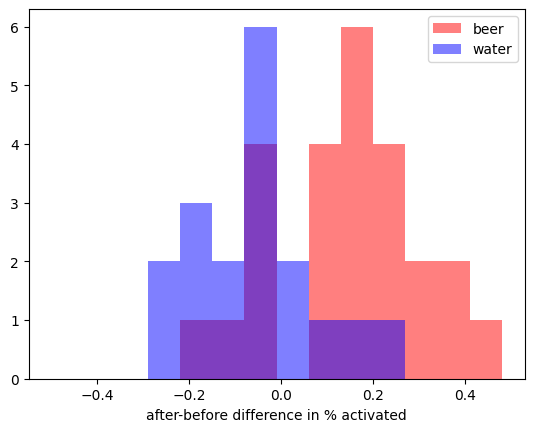

In [88]:
# plot the result
my_bins = np.arange(-0.5,0.5,0.07)
plt.hist(beer_data["act_diff"],bins=my_bins,alpha=0.5,color="red")
plt.hist(water_data["act_diff"],bins=my_bins,alpha=0.5,color="blue")
# to check if our np.arange range included the full range of values
print(np.min(combined_df["act_diff"]),"-",np.max(combined_df["act_diff"]))
plt.legend(["beer","water"])
plt.xlabel("after-before difference in % activated")

#### Looking at both the average difference and the plot you think there is a real difference?

# Testing for a difference

### Now we need to test if beer/water made a difference
#### Concepts:

- We apply our simulation logic:
  - Decide how many beer/water experiments to simulate (a low number first, then increase when your code is checked)
  - Save an array with space to store results
  - Make a loop
    - simulate one experiment
    - Here we do this by mixing up one column
      - ('permutation' means mixing up the outcomes)
    - Hint: You mix up the conditions you are testing (e.g. beer/water)
      - make sure you understand why
      - If beer/water doesn't matter, then mixing will not change the result
      - If they **do** matter than the simulated world will look very different from the real world
    - By mixing, we are simulating a world where beer and water are the same
    - Calculate the difference between the beer and water conditions
    - Store that result
    - repeat
- Compare the beer/water difference from the simulated 'no differencee' world with the real world
  - Plot a distribution of the simulated beer/water differences
    - These should cluster around 0
  - Plot the real word difference
  - Calculate a probability -- How likely was the real world difference in the simulated world?

###  What are the steps?

- make an array for results
- start a loop
  - mix up beer/water labels
  - get beer values and take mean
  - get water values and take mean
  - calculate beer_mean - water_mean
  - save the result
- plot the distribution of beer/water differences
- mark the real difference
- calculate a probability of the real difference in the no difference world
  - How many simulated differences were as big or bigger than the real world difference?
  - Divide this count by the total number of simulations

### Translate your conceptual steps into Python steps

### How do you randomly mix values?

numpy function: ```permute```

```np.random.permutation([array_to_permute])```

#### Code for the permutation test (surprisingly short)

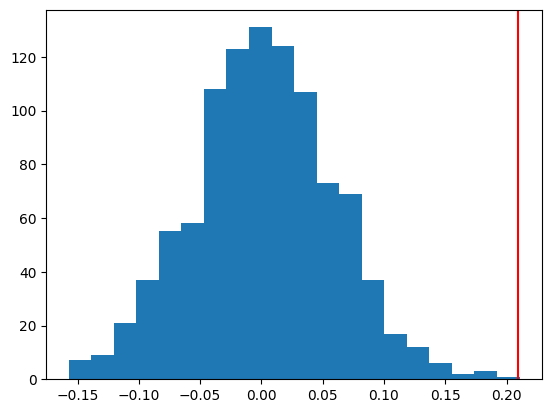

In [63]:
num_sim = 1000
sim_diff = np.zeros(num_sim)
for i in np.arange(0,num_sim):
    # mix the beer/water labels and store in a new column
    combined_df["mixed_group"] = np.random.permutation(combined_df["group"])
    # get a beer-only dataframe
    sim_beer=combined_df[combined_df["mixed_group"] == "beer"]
    # get a water-only dataframe
    sim_water=combined_df[combined_df["mixed_group"] == "water"]
    # calculate beer and water means
    sim_beer_mean = np.mean(sim_beer["act_diff"])
    sim_water_mean = np.mean(sim_water["act_diff"])
    # take the difference and store
    sim_diff[i] = sim_beer_mean - sim_water_mean
plt.hist(sim_diff,bins=20)
plt.axvline(beer_water_diff,color="red")

In [64]:
# Count the number of simulated values as big or bigger than the real value
sim_gt_real = np.count_nonzero(sim_diff >= beer_water_diff)
sim_gt_real

1

In [70]:
sim_diff_sorted = np.sort(sim_diff)
sim_diff_sorted[-1:-10:-1]

array([0.21059996, 0.19180738, 0.18423071, 0.18198916, 0.16670339,
       0.15824358, 0.15303109, 0.14820348, 0.1435975 ])